<a href="https://colab.research.google.com/github/pjcroxas/Bike_Sharing_Analysis/blob/main/Analyzing_Cycling_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import os
import datetime
import warnings
warnings.filterwarnings('ignore')

# **I. Load Data**

In [2]:
dirs = "/content/drive/My Drive/Data Science Portfolio/2024/Digital Marketing/Bike Sharing/Data"

import os
files = []
for dirname, _, filenames in os.walk(dirs):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        file_name = os.path.join(dirname, filename)
        files.append(file_name)
if len(files) == 12:
  print("File names are loaded successfully!")

File names are loaded successfully!


In [3]:
def concatenate_csv_files(file_paths):
    """
    Reads multiple CSV files from a list of file paths and concatenates them into a single DataFrame.

    Parameters:
    - file_paths: A list of strings where each string is the path to a CSV file
    - output_file: Path to the output CSV file where the concatenated DataFrame will be saved

    Returns:
    - A DataFrame containing the concatenated data
    """
    if not file_paths:
        raise ValueError("The list of file paths is empty.")

    # Read and concatenate all CSV files
    df_list = [pd.read_csv(file_path) for file_path in file_paths]
    concatenated_df = pd.concat(df_list, ignore_index=True)

    # Save the concatenated DataFrame to a new CSV file

    return concatenated_df


if __name__ == "__main__":
    concatenated_data = concatenate_csv_files(files)

In [4]:
# back-up the raw data
bike_share_df = concatenated_data.copy()
bike_share_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


# **II. Explore dataset**

In [5]:
# Percentage of missing rows
bike_share_df.isnull().sum() / bike_share_df.shape[0] * 100

,0
ride_id,0.000000
rideable_type,0.000000
started_at,0.000000
ended_at,0.000000
start_station_name,13.023007
start_station_id,13.022955
end_station_name,13.911812
end_station_id,13.911812
start_lat,0.000000
start_lng,0.000000


- `start_station_name`, `end_station_name`, and their respective station id's have the significant missing rows. However, since we have complete data for started_at, ended_at, and location, we are still good to go to analysis and modeling.

In [6]:
# Check datatype
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.7+ MB


- datetime columns are in string datatype. Processing in this columns are necessary

In [7]:
# Bike type
bike_share_df["rideable_type"].value_counts().reset_index()

,rideable_type,count
0,classic_bike,3250691
1,electric_bike,2168852
2,docked_bike,303989


In [8]:
# Membership type
bike_share_df["member_casual"].value_counts().reset_index()

,member_casual,count
0,member,3176990
1,casual,2546542


# **III. Prepare Data**

In [9]:
import datetime as dt
from datetime import datetime as dt

In [10]:
# convert `started_at` and `ended_at` to datetime
bike_share_df["started_at"] = pd.to_datetime(bike_share_df["started_at"])
bike_share_df["ended_at"] = pd.to_datetime(bike_share_df["ended_at"])
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 567.7+ MB


In [11]:
# Create total travel time
bike_share_df["travel_time_mins"] = (bike_share_df["ended_at"] - bike_share_df["started_at"]).dt.total_seconds()/60
bike_share_df["travel_time_days"] = (bike_share_df["ended_at"] - bike_share_df["started_at"]).dt.days

In [12]:
# Create total distance covered
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

bike_share_df['total_distance_km'] = bike_share_df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

In [61]:
# Compute travel velocity
bike_share_df["travel_time_s"] = bike_share_df["travel_time_mins"] * 60
bike_share_df["travel_velocity_kms"] = bike_share_df["total_distance_km"] / bike_share_df["travel_time_s"]

In [14]:
# Other date features
bike_share_df["start_hour_at"] = bike_share_df["started_at"].dt.hour
bike_share_df["start_day_at"] = bike_share_df["started_at"].dt.day
bike_share_df["start_weekday"] = bike_share_df["started_at"].dt.day_name()

In [15]:
# update column
cols = ['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'travel_time_mins', 'travel_time_days',
       'total_distance_km', 'travel_velocity_kms',
        'start_hour_at', 'start_day_at', 'start_weekday']
bike_share_df = bike_share_df[cols]

# **IV. Data Viz**

In [16]:
bike_share_df.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,travel_time_mins,travel_time_days,total_distance_km,travel_velocity_kms,start_hour_at,start_day_at,start_weekday
1549527,CDB805B713278459,classic_bike,2021-06-30 12:09:02,2021-06-30 13:14:08,Lake Shore Dr & Monroe St,13300,Fairbanks Ct & Grand Ave,TA1305000003,41.880958,-87.616743,41.891847,-87.620580,casual,65.100000,0,1.252169,0.000321,12,30,Wednesday
1434026,C9FDE04920BBB944,classic_bike,2021-06-15 08:38:19,2021-06-15 08:51:08,Michigan Ave & 14th St,TA1307000124,Wabash Ave & Adams St,KA1503000015,41.864059,-87.623727,41.879472,-87.625689,member,12.816667,0,1.722052,0.002239,8,15,Tuesday
942225,9301A7CF17D9C46B,classic_bike,2021-05-19 18:14:14,2021-05-19 18:35:24,Campbell Ave & North Ave,13257,Franklin St & Jackson Blvd,TA1305000025,41.910535,-87.689556,41.877708,-87.635321,member,21.166667,0,5.787469,0.004557,18,19,Wednesday


In [17]:
start_stx = bike_share_df.groupby(["start_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)
end_stx = bike_share_df.groupby(["end_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)

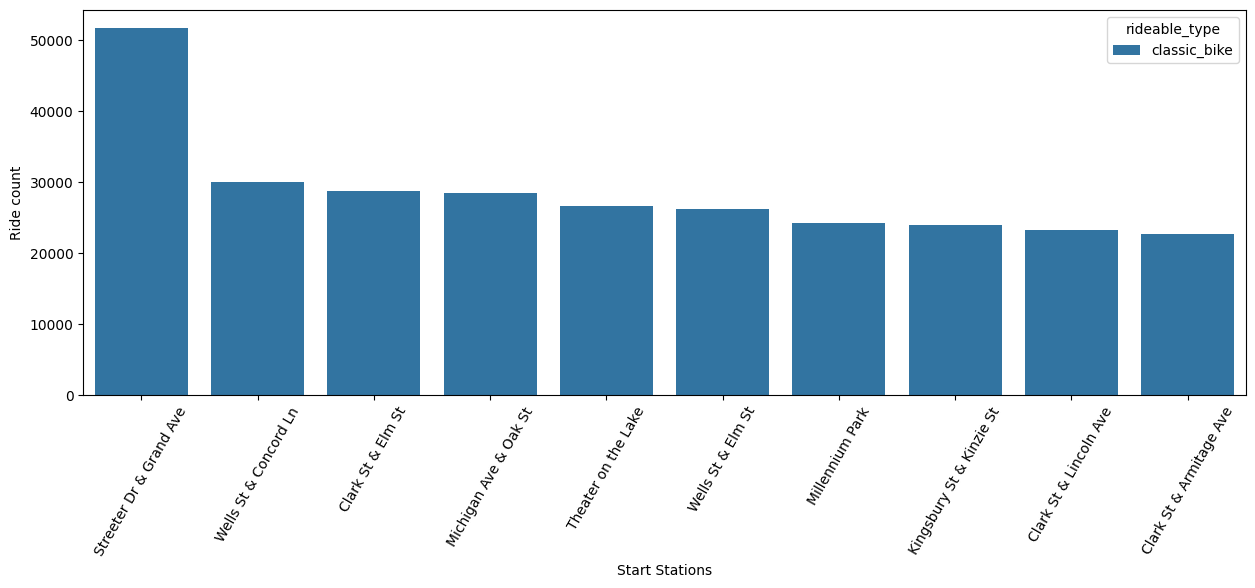

In [18]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(start_stx[:10],
                  x="start_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=60)
plt.xlabel("Start Stations")
plt.ylabel("Ride count")
plt.show()

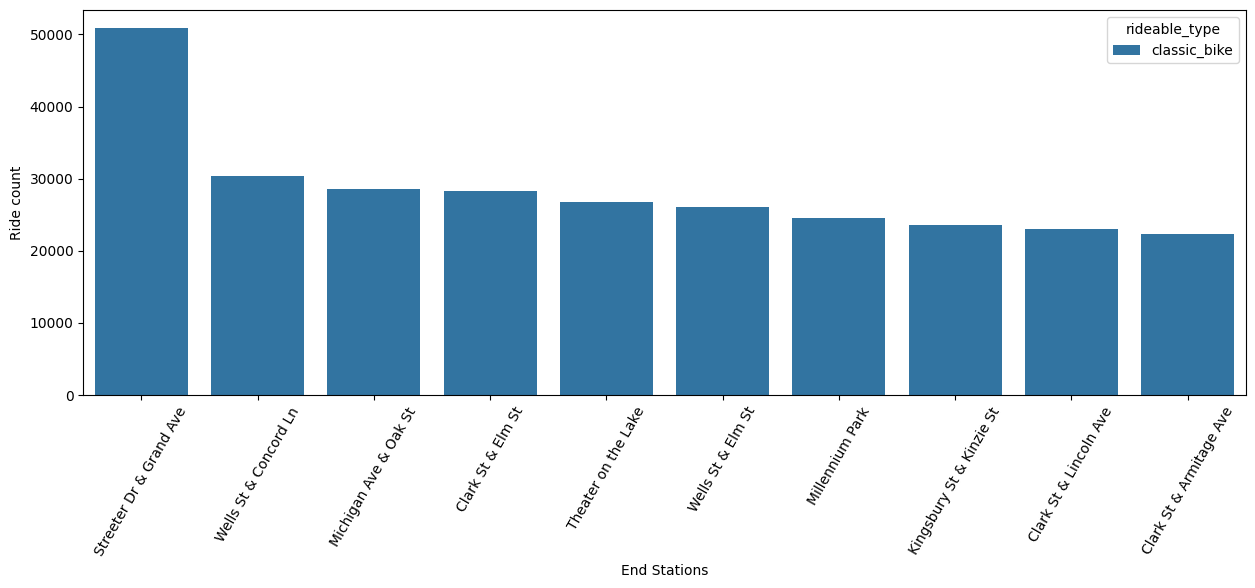

In [19]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(end_stx[:10],
                  x="end_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=60)
plt.xlabel("End Stations")
plt.ylabel("Ride count")
plt.show()

In [20]:
# Top routes
route_stx = bike_share_df.groupby(["start_station_name", "end_station_name"]).agg({
    "ride_id": "count",
    "total_distance_km": "mean"
}).reset_index().sort_values(by="ride_id", ascending=False)
route_stx["route"] = route_stx["start_station_name"] + " - " + route_stx["end_station_name"]

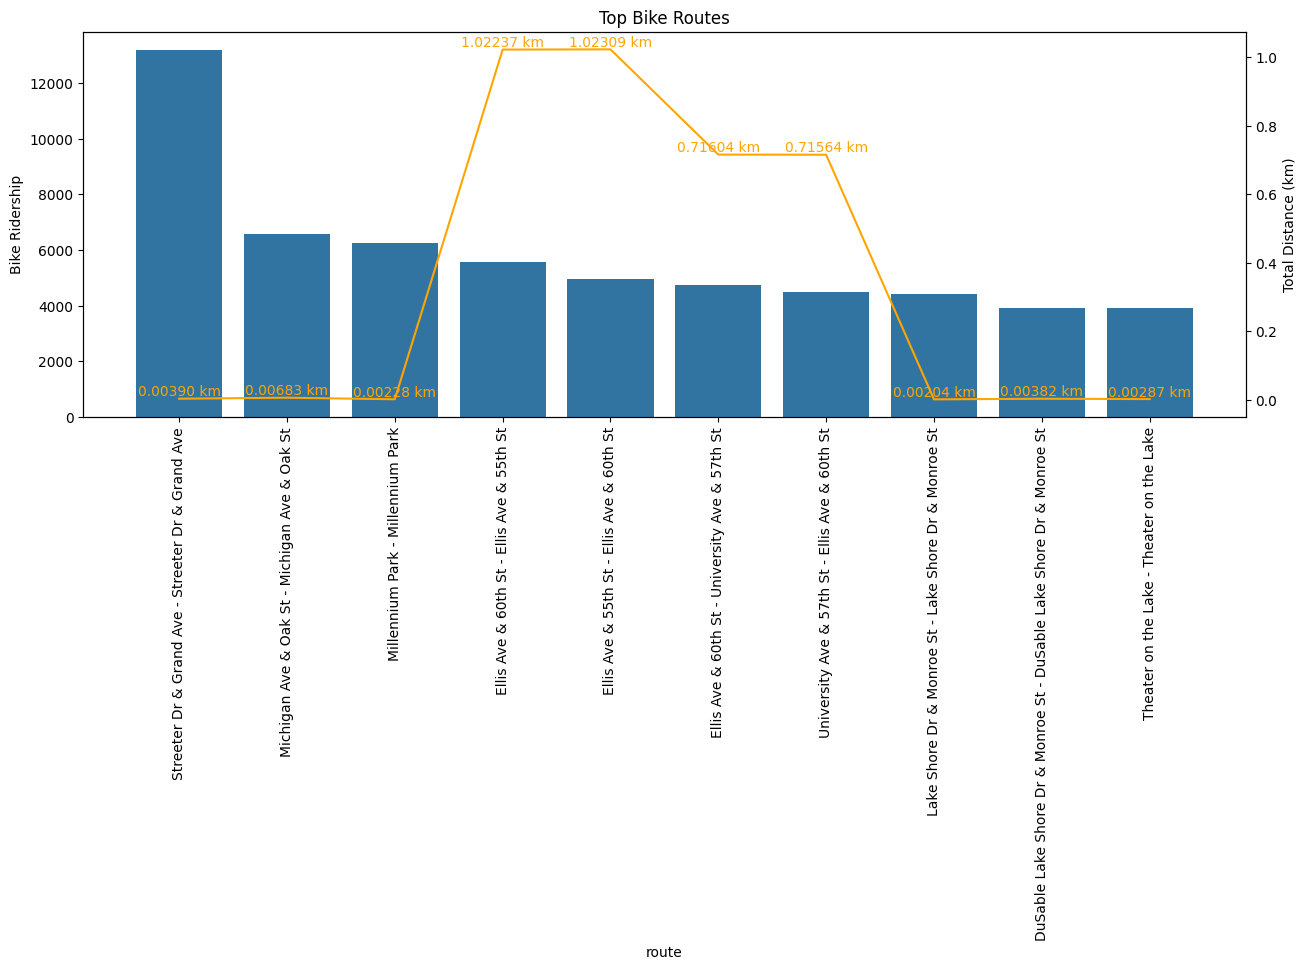

In [21]:
# plt.figure()
route_stx_10 = route_stx[:10]
fig, ax1 = plt.subplots(figsize=(15, 5))


sns.barplot(route_stx_10,
                  x="route",
                  y="ride_id",
                  ax=ax1)
ax1.set_ylabel("Bike Ridership")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
sns.lineplot(route_stx_10,
                  x="route",
                  y="total_distance_km",
                  ax=ax2,
                  color="orange")
ax2.set_ylabel("Total Distance (km)")


plt.title("Top Bike Routes")
for x, y in zip(route_stx_10["route"][:10], route_stx_10["total_distance_km"][:10]):
    ax2.text(x, y, f'{y:.5f} km', color='orange', ha='center', va='bottom')
plt.show()

From the derived top routes and its corresponding distance covered, we can infer that there are errors encountered during data collection. It can be suggested that there are gps sensors that still working even if its not traversing the road. There are routes that covers less than 9 meters and didn't move from its origin station. Because of this we have to drop the rows that have the same origin and destination.

### Dropping error records

In [22]:
bike_share_df = bike_share_df[bike_share_df['start_station_name'] != bike_share_df['end_station_name']]

In [23]:
# Top origin
start_stx = bike_share_df.groupby(["start_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)
end_stx = bike_share_df.groupby(["end_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)

## **Top origin stations**

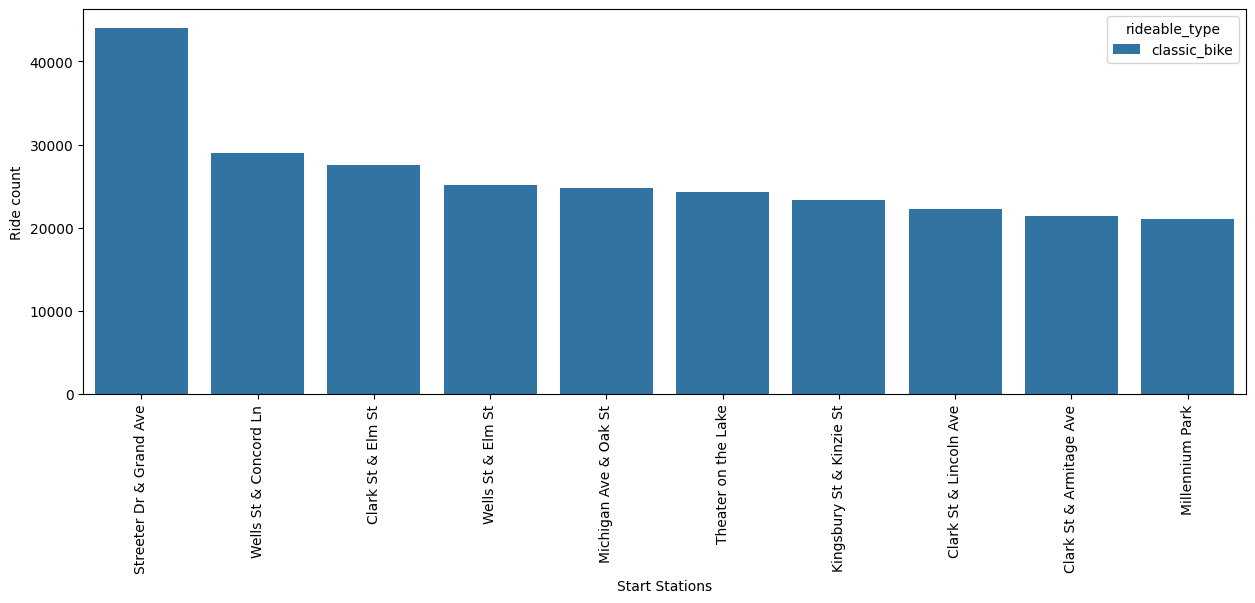

In [24]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(start_stx[:10],
                  x="start_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=90)
plt.xlabel("Start Stations")
plt.ylabel("Ride count")
plt.show()

## **Top destination based on ridership**

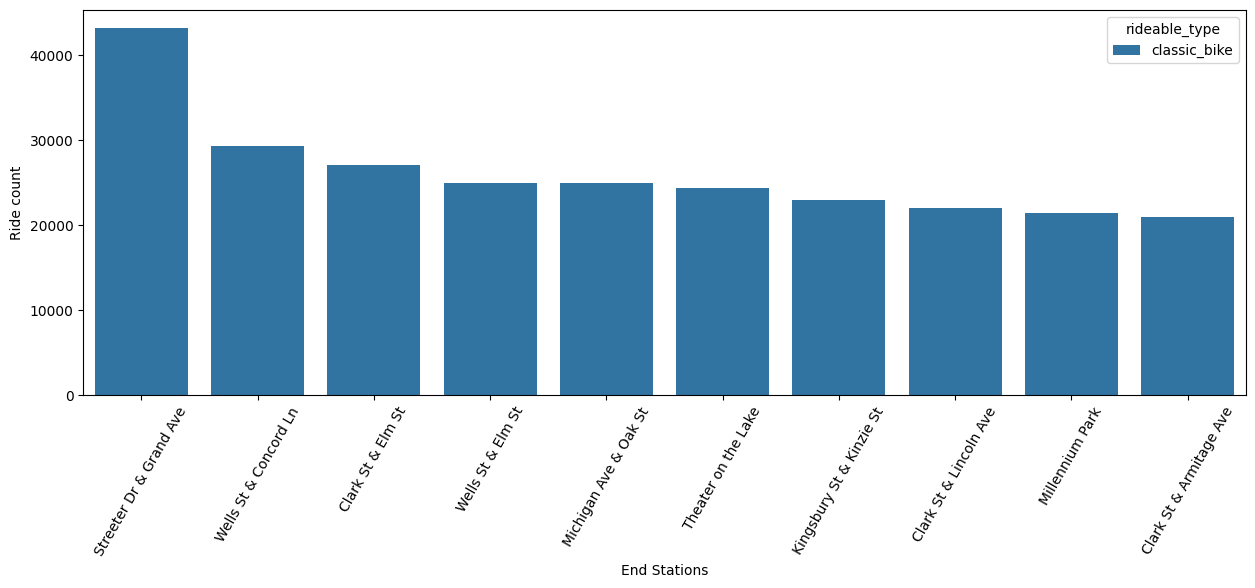

In [25]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(end_stx[:10],
                  x="end_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=60)
plt.xlabel("End Stations")
plt.ylabel("Ride count")
plt.show()

## **Top Routes**

In [26]:
# Top routes
route_stx = bike_share_df.groupby(["start_station_name", "end_station_name"]).agg({
    "ride_id": "count",
    "total_distance_km": "mean"
}).reset_index().sort_values(by="ride_id", ascending=False)
route_stx["route"] = route_stx["start_station_name"] + " - " + route_stx["end_station_name"]

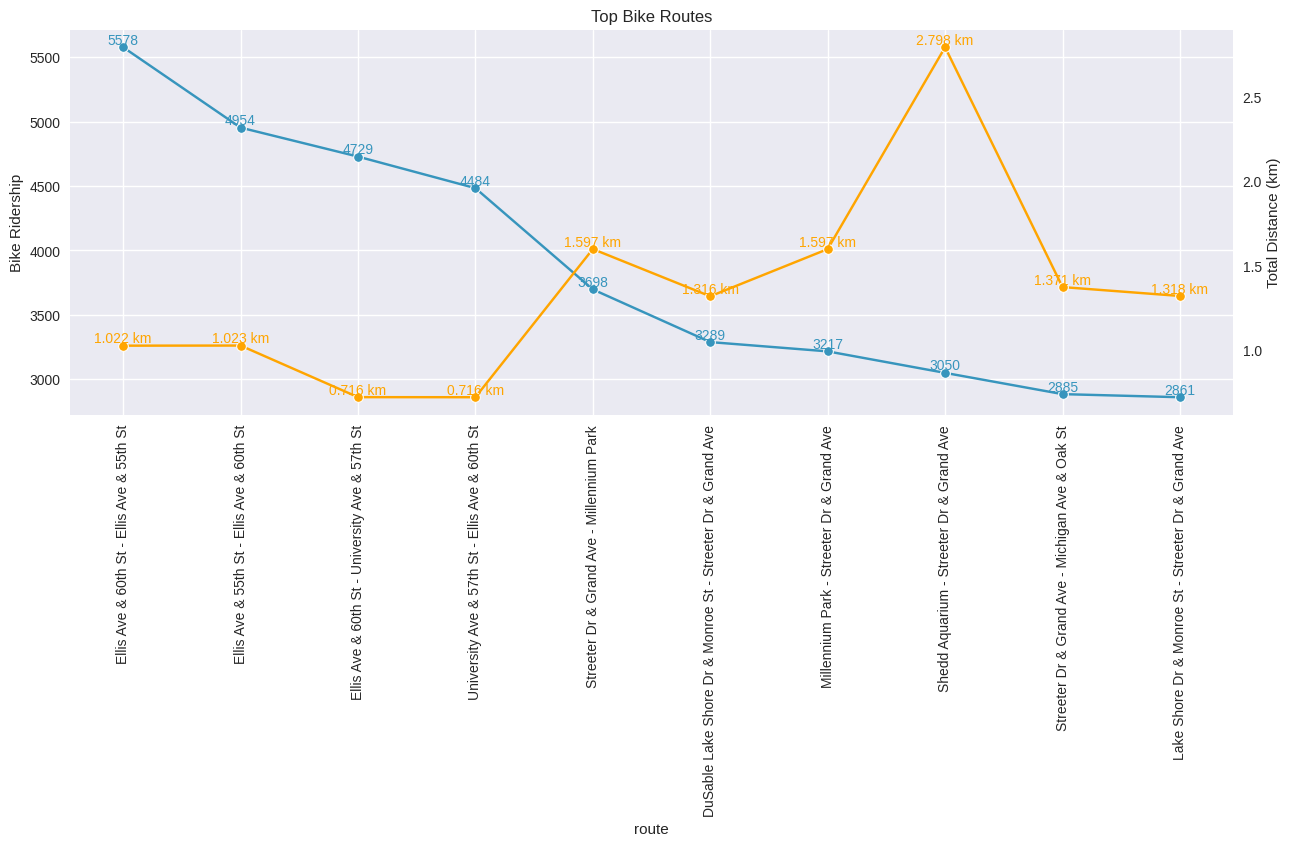

In [27]:
# plt.figure()
style.use("seaborn")
route_stx_10 = route_stx[:10]
fig, ax1 = plt.subplots(figsize=(15, 5))

sns.lineplot(route_stx_10,
             x="route",
             y="ride_id",
             ax=ax1,
             color="#3795BD",
             marker="o")

ax1.set_ylabel("Bike Ridership")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

for xx, yy in zip(route_stx_10["route"][:10], route_stx_10["ride_id"][:10]):
    ax1.text(xx, yy, f'{yy}', color='#3795BD', ha='center', va='bottom')

ax2 = ax1.twinx()
sns.lineplot(route_stx_10,
                  x="route",
                  y="total_distance_km",
                  ax=ax2,
                  color="orange",
                  marker="o")
ax2.set_ylabel("Total Distance (km)")

plt.title("Top Bike Routes")
plt.grid()
for x, y in zip(route_stx_10["route"][:10], route_stx_10["total_distance_km"][:10]):
    ax2.text(x, y, f'{y:.3f} km', color='orange', ha='center', va='bottom')
plt.show()

Top routes for bike sharing consists of distances that ranges from 0.716 km to 2.798 km.
- Ellis Ave 60th st to 55th st route ranks the most number of rides, with the average of 1.022 km.

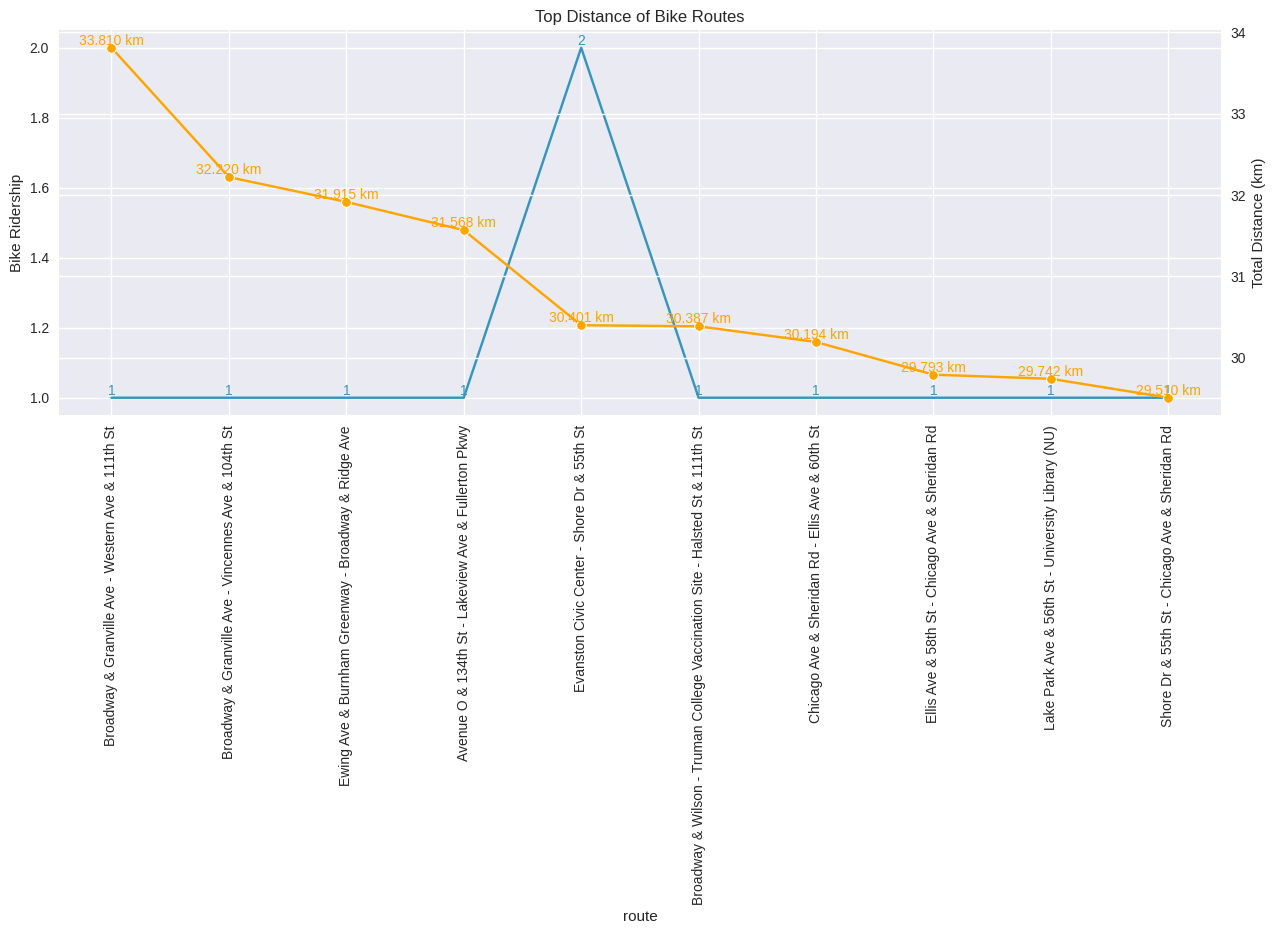

In [28]:
route_distance = route_stx.sort_values(by="total_distance_km", ascending=False)
route_distance = route_distance[:10]
fig, ax1 = plt.subplots(figsize=(15, 5))

sns.lineplot(route_distance,
                  x="route",
                  y="ride_id",
                  ax=ax1,
                  color="#3795BD")
ax1.set_ylabel("Bike Ridership")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

for xx, yy in zip(route_distance["route"][:10], route_distance["ride_id"][:10]):
    ax1.text(xx, yy, f'{yy}', color='#3795BD', ha='center', va='bottom')
ax2 = ax1.twinx()
sns.lineplot(route_distance,
                  x="route",
                  y="total_distance_km",
                  ax=ax2,
                  color="orange",
             marker="o")

ax2.set_ylabel("Total Distance (km)")
plt.title("Top Distance of Bike Routes")
for x, y in zip(route_distance["route"][:10], route_distance["total_distance_km"][:10]):
    ax2.text(x, y, f'{y:.3f} km', color='orange', ha='center', va='bottom')
plt.show()

## **Ridership**

In [29]:
bike_share_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'travel_time_mins', 'travel_time_days',
       'total_distance_km', 'travel_velocity_kms', 'start_hour_at',
       'start_day_at', 'start_weekday'],
      dtype='object')

In [30]:
ride_count = bike_share_df.groupby(["start_hour_at", "start_day_at", "start_weekday"]).count()["ride_id"].reset_index()
ride_avg = ride_count.groupby(["start_hour_at", "start_weekday"]).mean()["ride_id"].reset_index()
ride_avg

,start_hour_at,start_weekday,ride_id
0,0,Friday,327.290323
1,0,Monday,219.387097
2,0,Saturday,701.419355
3,0,Sunday,828.193548
4,0,Thursday,219.193548
...,...,...,...
163,23,Saturday,964.677419
164,23,Sunday,380.258065
165,23,Thursday,568.806452
166,23,Tuesday,376.645161


Text(0.5, 1.0, 'Hourly Bike Ridership per Day')

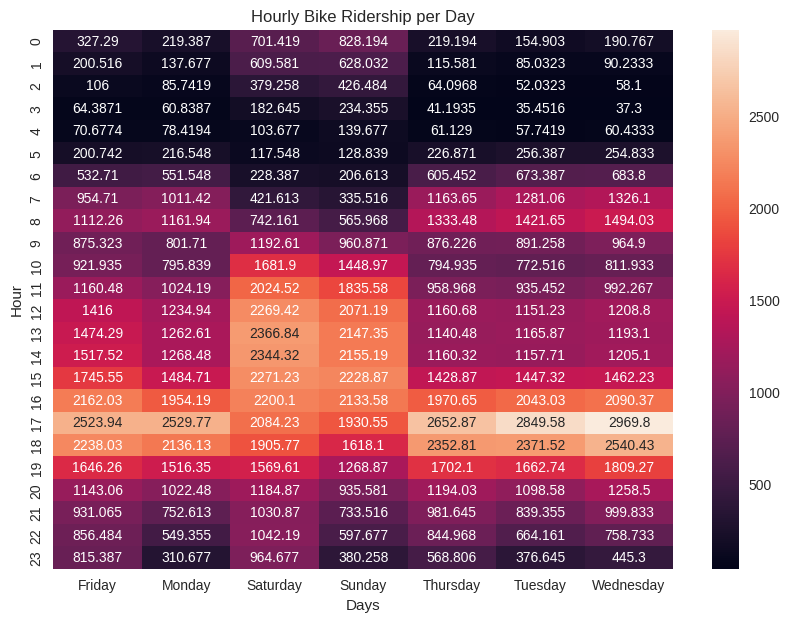

In [31]:
ride_avg_pivot = ride_avg.pivot_table(
    index = "start_hour_at",
    columns = "start_weekday",
    values = "ride_id"
)

plt.figure(figsize=(10,7))
sns.heatmap(ride_avg_pivot, annot=True, fmt="g")
plt.ylabel("Hour")
plt.xlabel("Days")
plt.title("Hourly Bike Ridership per Day")

In [32]:
distance_avg = bike_share_df.groupby(["start_hour_at", "start_day_at", "start_weekday"]).agg({
    'total_distance_km':'mean'
}).reset_index()

Text(0.5, 1.0, 'Hourly Travel Distance per Day (km)')

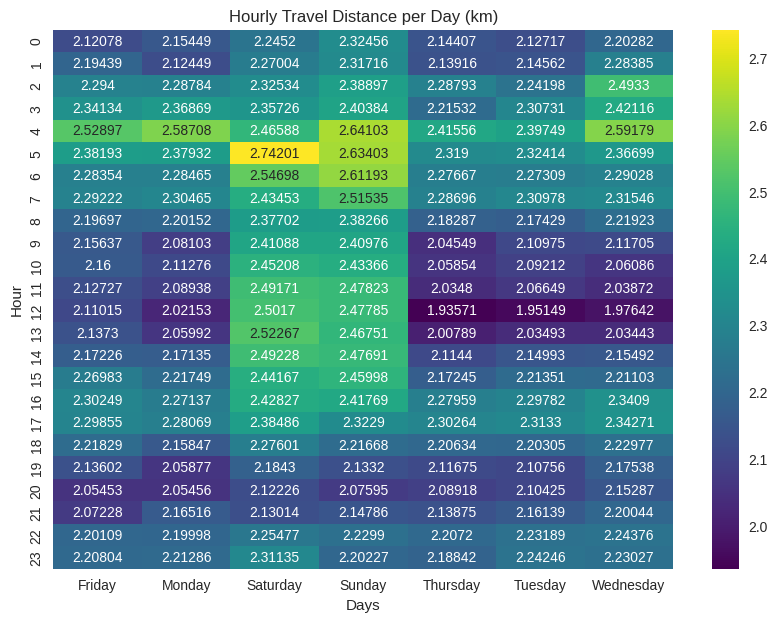

In [33]:
ride_avg_pivot = distance_avg.pivot_table(
    index = "start_hour_at",
    columns = "start_weekday",
    values = "total_distance_km"
)

plt.figure(figsize=(10,7))
sns.heatmap(ride_avg_pivot, annot=True, fmt="g", cmap="viridis")
plt.ylabel("Hour")
plt.xlabel("Days")
plt.title("Hourly Travel Distance per Day (km)")

- Ridership for weekdays has two peaks:
  - 8 AM between 1112 to 1494 rides
  - 5 PM between 2523 to 2969 rides (on-peak)
- Distance travelled during weekdays are right-skewed.
- Ridership for weekend are partiall normal with a wider peak. For both Saturday and Sunday bikers has longer hour of activities which started from 10 AM to 7 PM.
- Additionally, during weekends, travel distance can reach up to 2.4 km in 4 AM to 2.3 km in 5 PM, that peaks at 2pm with 2.5 km.

## **Usage by Distance**

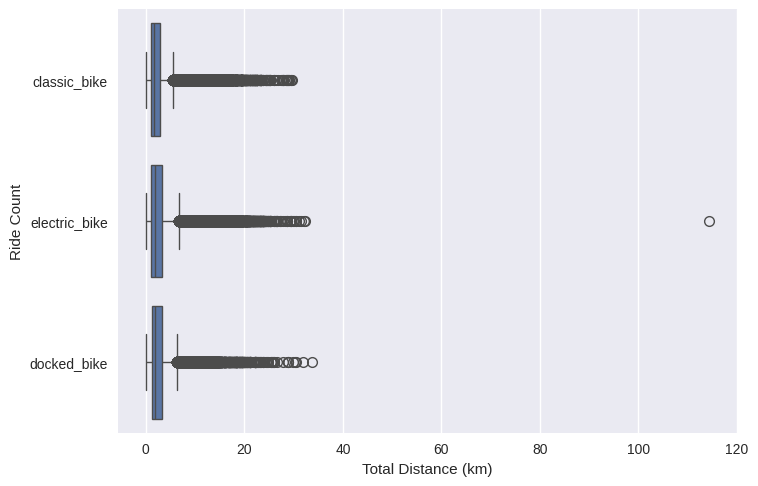

In [34]:
sns.boxplot(bike_share_df,
             x="total_distance_km",
             y="rideable_type")
plt.ylabel("Ride Count")
plt.xlabel("Total Distance (km)")
plt.show()

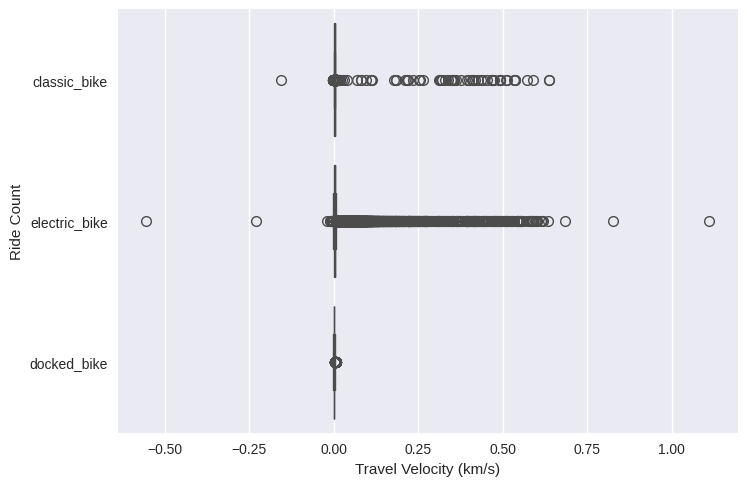

In [35]:
sns.boxplot(bike_share_df,
             x="travel_velocity_kms",
             y="rideable_type")
plt.ylabel("Ride Count")
plt.xlabel("Travel Velocity (km/s)")
plt.show()

-

- The three bike types follow almost the same distance distribution, with the exception of electric bikes because of its outlier.
- Electric bikes scan be used to transport up to 100 km distance.
- Negative velocity for electric and classic suggests that they can be used from origin to destination then vice versa. We can infer, in a network perspective that transportation in this two type of bikes are bidirectional in nature.
- On the other hand, docked bikes are unidirectional.

# **V. Spatial Analysis**

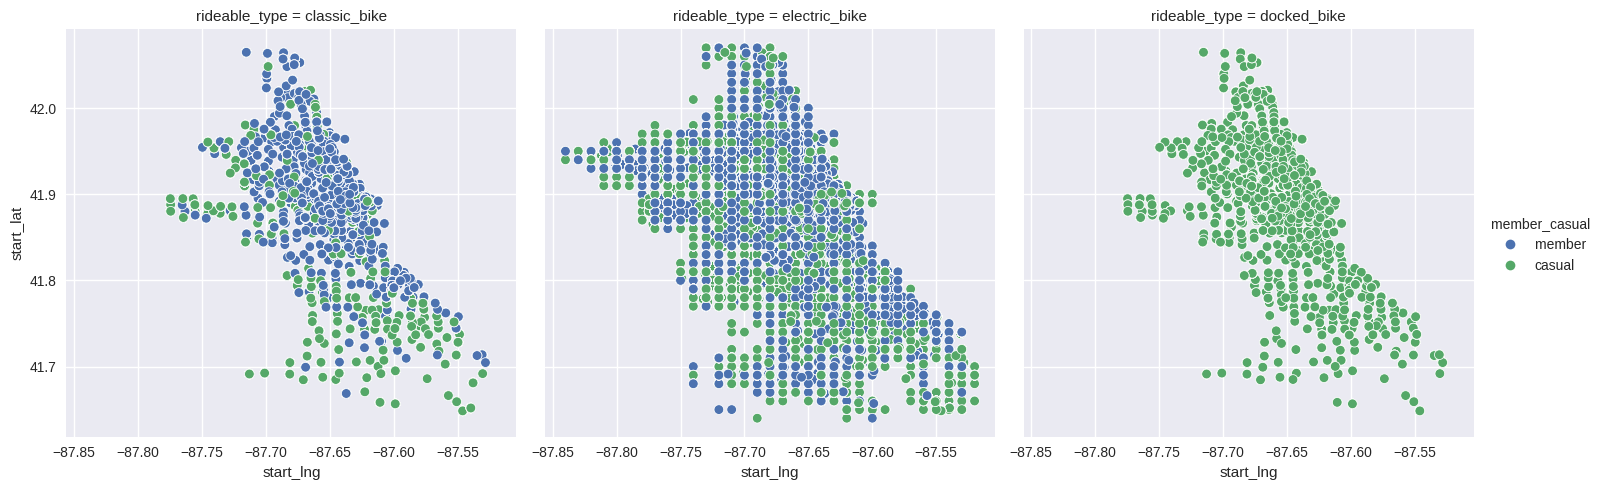

In [36]:
sns.relplot(bike_share_df,
                x="start_lng",
                y="start_lat",
                hue="member_casual",
                col="rideable_type")

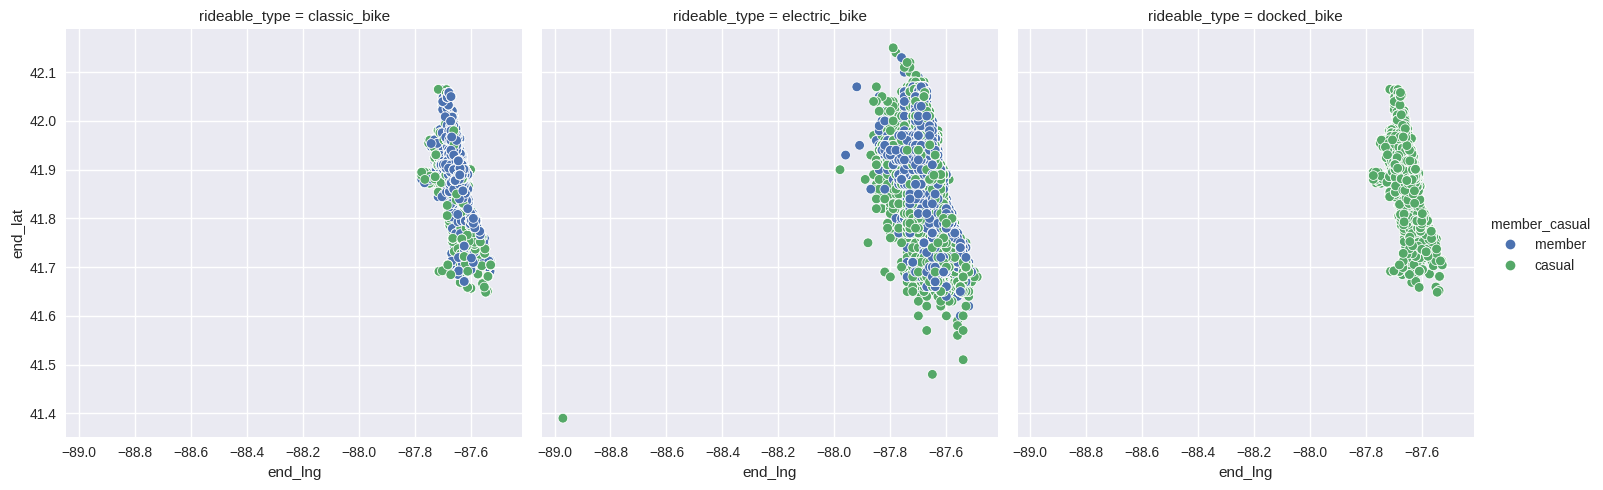

In [37]:
sns.relplot(bike_share_df,
                x="end_lng",
                y="end_lat",
                hue="member_casual",
                col="rideable_type")

# **VI. Statistical Analysis**

Descriptive analysis allows us to have an overview of our data. However, we can't prove otherwise our assumptions are true unless proper testing were conducted. In this part, we will test our assumption and prove them if they are significant or not.

### **Drop infinite and null values**

In [45]:
# Drop infinite values
bike_share_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop missing values
bike_share_df.dropna(how="all", inplace=True)

# Transform distance metrics to positive values
bike_share_df["travel_time_mins"] = np.abs(bike_share_df["travel_time_mins"])
bike_share_df["travel_velocity_kms"] = np.abs(bike_share_df["travel_velocity_kms"])

# Check descriptive features
bike_share_df.describe(include=[float, int]).T

,count,mean,std,min,25%,50%,75%,max
start_lat,5390586.0,41.900852,0.046015,41.64,41.881690,41.898969,41.929143,4.207000e+01
start_lng,5390586.0,-87.646692,0.029085,-87.84,-87.660285,-87.643107,-87.628722,-8.752000e+01
end_lat,5385870.0,41.901130,0.046129,41.39,41.881892,41.899930,41.929277,4.215000e+01
end_lng,5385870.0,-87.646911,0.029265,-88.97,-87.661155,-87.643118,-87.628895,-8.749000e+01
travel_time_mins,5390586.0,20.531581,179.239716,0.00,6.650000,11.550000,20.400000,5.594415e+04
travel_time_days,5390586.0,0.001601,0.117619,-1.00,0.000000,0.000000,0.000000,3.800000e+01
total_distance_km,5385870.0,2.307803,1.951683,0.00,1.024146,1.713231,2.976890,1.144159e+02
travel_velocity_kms,5385447.0,0.002888,0.003693,0.00,0.002050,0.002874,0.003660,1.112263e+00
start_hour_at,5390586.0,14.210765,5.060358,0.00,11.000000,15.000000,18.000000,2.300000e+01
start_day_at,5390586.0,15.402594,8.743407,1.00,8.000000,15.000000,23.000000,3.100000e+01


Key points to see in this table:
- `travel_time_s`, 'travel_distance_km' and `travel_velocity_kms` are both left skewed. This is due to the presence of outliers.
- We need to normalize this feature in order to conduct hypothesis testing.

In [50]:
bike_share_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'travel_time_mins', 'travel_time_days',
       'total_distance_km', 'travel_velocity_kms', 'start_hour_at',
       'start_day_at', 'start_weekday', 'trave_velocity_kms', 'travel_time_s'],
      dtype='object')

### **Normalization**

For normalization we will use winsorize the two features. In this approach we will transform the outlier to values closer to the normal distribution.

In [65]:
from scipy.stats.mstats import winsorize


travel_time_mins = winsorize(bike_share_df["travel_time_mins"], limits=[0.2, 0.25])
print("Travel Time (mins) = Min: ",travel_time_mins.min(),"Mean: ", travel_time_mins.mean()  ," Max: ",travel_time_mins.max())

travel_velocity_kms = winsorize(bike_share_df["travel_velocity_kms"], limits=[0.2, 0.25])
print("Travel Velocity (km/s) = Min: ",travel_velocity_kms.min(),"Mean: ", travel_velocity_kms.mean()  ," Max: ",travel_velocity_kms.max())

travel_distance_km = winsorize(bike_share_df["total_distance_km"], limits=[0.2, 0.25])
print("Travel Distance (km) = Min: ",travel_distance_km.min(),"Mean: ", travel_distance_km.mean()  ," Max: ",travel_distance_km.max())

Travel Time (mins) = Min:  5.816666666666666 Mean:  12.653459444545236  Max:  20.4
Travel Velocity (km/s) = Min:  0.0018003802114413014 Mean:  0.0028078273033692127  Max:  0.003662675756452162
Travel Distance (km) = Min:  0.8823438205854275 Mean:  1.8786670944961217  Max:  2.98232536905192


In [66]:
bike_share_df["travel_time_mins"] = travel_time_mins
bike_share_df["travel_velocity_kms"] = travel_velocity_kms
bike_share_df["travel_distance_km"] = travel_distance_km

### **Hypothesis Testing**

In [114]:
import pingouin

# take a random sampling of 1000
bike_share_sample_1000 = bike_share_df.sample(1000)

**1. Is there a significant difference in travel time between electric bikes and regular bikes?**
- *HO*: The mean travel time is the same for electric bikes, classic and docked bikes.
- *HA*: The mean travel time is different for electric bikes, classic and docked bikes.
- significance level or alpha = 0.05

In [115]:
# Conduct an ANOVA

pingouin.anova(bike_share_sample_1000,
               dv="travel_time_mins",
               between="rideable_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,rideable_type,2,997,23.427089,1.141772e-10,0.044886


- `p-unc` is the resulting p-value in this ANOVA test. Since `p-unc` is`1.141772e-1` and our set alpha is 0.05, there is a strong evidence to reject the null hypothesis.
- This suggests the travel time is dependent to bicycle type.

____
**2. Do members and non-members travel different distances on average?**
- *H0*: There is no significant difference in travel distance between members and non-members.
- *HA*: There is a significant difference in travel distance between members and non-members.
- significance level or alpha = 0.05

In [116]:
# Use a two-sample t-test

# Compute mean distance per member type
xbar = bike_share_sample_1000.groupby("member_casual")['total_distance_km'].mean()

# Compute std dev distance per member type
s =  bike_share_sample_1000.groupby("member_casual")['total_distance_km'].std()

# Compute sample count distance per member type
n = bike_share_sample_1000.groupby("member_casual")["ride_id"].count()

# compute t-stat
numerator = xbar["casual"] - xbar["member"]
denominator = np.sqrt(s["casual"] ** 2 / n["casual"]) + np.sqrt(s["member"] ** 2 / n["member"])

t_stat = numerator / denominator
print("t-stat: ", t_stat)

t-stat:  0.6715009599253198


In [117]:
from scipy.stats import t

# compute degrees of freedom
df = n["casual"] + n["member"] - 2

# compute p-value
p_value = t.cdf(t_stat, df=df)

print("p-value: ", p_value)

p-value:  0.7489715773551133


Since our `p-value` is `0.75` and the set alpha is `0.05`, we can't reject the null hypothesis. Therefore, there is no significant difference between the distance travelled by member or casual.

____

**3. Is the travel distance dependent on the type of bike used?**
Hypotheses:
- *HO*: Travel distance is independent of the type of bike.
- *HA*: Travel distance depends on the type of bike.
- alpha = 0.05

In [118]:
# Conduct an ANOVA
pingouin.anova(bike_share_sample_1000,
               dv="total_distance_km",
               between="rideable_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,rideable_type,2,997,2.578043,0.076429,0.005145


- `p-value` is `0.076`, which is larger than the alpha
- This suggest that distance is independent from bicycle type.
___

**4. : Is there a significant difference in average travel time between peak hours (e.g., 7-9 AM, 5-7 PM) and non-peak hours?**
- *HO*: The average travel time is the same between peak and non-peak hours.
- *H1*: The average travel time differs between peak and non-peak hours.
- alpha = 0.05

In [136]:
# Create feature weekday_weekend
def weekday_weekend(data):
  if (data == "Sunday" or data == "Saturday"):
    return "weekend"
  else:
    return "weekday"

def peak_hour(data, lower, upper):
  if (lower <= data <= upper):
    return "on-peak"
  else:
    return "off-peak"

bike_share_df["weekday_weekend"] = bike_share_df["start_weekday"].apply(weekday_weekend)

**Case 1: Workweek or weekday**

In [140]:
bike_share_df_weekday = bike_share_df[bike_share_df["weekday_weekend"]=="weekday"].sample(1000)
bike_share_df_weekday["peak_or_not"] = bike_share_df_weekday["start_hour_at"].apply(lambda x: peak_hour(x, 16, 19))

# Use a two-sample t-test

# Compute mean distance per member type
xbar = bike_share_df_weekday.groupby("peak_or_not")['travel_time_mins'].mean()

# Compute std dev distance per member type
s =  bike_share_df_weekday.groupby("peak_or_not")['travel_time_mins'].std()

# Compute sample count distance per member type
n = bike_share_df_weekday.groupby("peak_or_not")["ride_id"].count()

# compute t-stat
numerator = xbar["off-peak"] - xbar["on-peak"]
denominator = np.sqrt(s["off-peak"] ** 2 / n["off-peak"]) + np.sqrt(s["on-peak"] ** 2 / n["on-peak"])

t_stat = numerator / denominator
print("t-stat: ", t_stat)

t-stat:  -1.2475253767918348


In [141]:
# compute degrees of freedom
df = n["off-peak"] + n["on-peak"] - 2

# compute p-value
p_value = t.cdf(t_stat, df=df)

print("p-value: ", p_value)

p-value:  0.10624878514238995


- Since our computed p-value is `0.106` which is greater than alpha, this suggest that average travel time during weekday is the same between peak and non-peak hours.

**Case 2: Weekends**

In [142]:
bike_share_df_weekend = bike_share_df[bike_share_df["weekday_weekend"]=="weekend"].sample(1000)
bike_share_df_weekend["peak_or_not"] = bike_share_df_weekend["start_hour_at"].apply(lambda x: peak_hour(x, 11, 18))

# Use a two-sample t-test

# Compute mean distance per member type
xbar = bike_share_df_weekend.groupby("peak_or_not")['travel_time_mins'].mean()

# Compute std dev distance per member type
s =  bike_share_df_weekend.groupby("peak_or_not")['travel_time_mins'].std()

# Compute sample count distance per member type
n = bike_share_df_weekend.groupby("peak_or_not")["ride_id"].count()

# compute t-stat
numerator = xbar["off-peak"] - xbar["on-peak"]
denominator = np.sqrt(s["off-peak"] ** 2 / n["off-peak"]) + np.sqrt(s["on-peak"] ** 2 / n["on-peak"])

t_stat = numerator / denominator
print("t-stat: ", t_stat)

t-stat:  -1.446954334499788


In [143]:
# compute degrees of freedom
df = n["off-peak"] + n["on-peak"] - 2

# compute p-value
p_value = t.cdf(t_stat, df=df)

print("p-value: ", p_value)

p-value:  0.07411186268525993


- Since our computed p-value is `0.074` which is greater than alpha, this suggest that average travel time during weekends is the same between peak and non-peak hours.

____
**5. Is the choice of bike type (e.g., electric, classic, docked) influenced by bike membership status?**
- *H0*: Bike membership status does not influence the choice of bike type.
- *HA*: Bike membership status influences the choice of bike type.

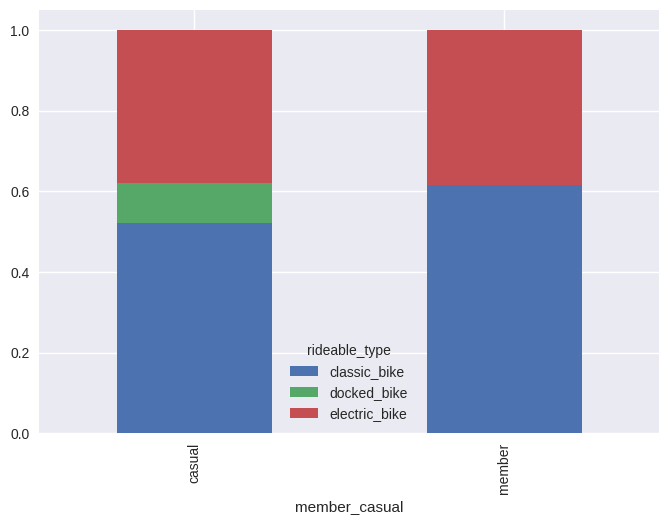

In [144]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = bike_share_sample_1000.groupby("member_casual")["rideable_type"].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [145]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(
    data=bike_share_sample_1000,
    x="member_casual",
    y="rideable_type"
)

# Print results
print(stats[stats['test'] == 'pearson'])

      test  lambda       chi2  dof          pval    cramer  power
0  pearson     1.0  61.281894  2.0  4.929534e-14  0.247552    1.0


- The computed p-value is `4.929534e-14`, this is lower than alpha of 0.5. This tells us to reject the null hypothesis.
- This suggests that there is a association between membership type and bicycle type.

____
**6. Is there an interaction effect between bike type and membership status on travel velocity?**
- *HO*: There is no interaction effect between bike type and membership status on travel velocity.
- *HA*: There is an interaction effect between bike type and membership status on travel velocity.
- alpha: 0.05

In [146]:
# Conduct ANOVA
pingouin.anova(bike_share_sample_1000,
               dv="travel_velocity_kms",
               between=["rideable_type", "member_casual"])

,Source,SS,DF,MS,F,p-unc,np2
0,rideable_type,0.005057,2.0,2.528425e-03,5433.076615,0.000000e+00,0.916113
1,member_casual,0.000008,1.0,7.683265e-06,16.509791,5.221072e-05,0.016322
2,rideable_type * member_casual,0.000051,2.0,2.540893e-05,54.598676,3.171383e-23,0.098893
3,Residual,0.000463,995.0,4.653763e-07,NaN,NaN,NaN


- computed p-value for `rideable_type` and `member_casual` are 0.0~ and 5.22E-5 respectively.
- This values tells us to reject the null hypothesis.
- For `rideable type` there is a strong evidence that travel velocity is dependent on it. As well as membership type.
____

### **Summary of Analysis**
| Null Hypthesis (HO) | Alternative Hypothesis (HA) | p-value | Conlusion |
| -------- | ------- | ------- | ------- |
| The mean travel time is the same for electric bikes, <br>classic and docked bikes | The mean travel time is different for electric bikes, classic and docked bikes | 1.141772e-10 | Travel time is dependent to bicycle type |
|There is no significant difference in travel distance <br> between members and non-members |There is a significant difference in travel distance between<br> members and non-members |0.748 |There is no significant difference between the<br> distance travelled by member or casual|
| Travel distance is independent of the type of bike| Travel distance depends on the type of bike | 0.076429 |distance is independent from bicycle type|
|The average travel time is the same between peak <br>and non-peak hours|The average travel time is the same between <br>peak and non-peak hours|0.106|average travel time during weekdays is the same between <br>peak and non-peak hours|
|The average travel time is the same between peak <br>and non-peak hours|The average travel time is the same between <br>peak and non-peak hours|0.074|average travel time during weekends is the same between <br>peak and non-peak hours|
|Bike membership status does not influence <br>the choice of bike type|Bike membership status influences the choice of bike type|4.929534e-14|There is an association between membership type and bicycle type|
|There is no interaction effect between bike type <br>and membership status on travel velocity|There is an interaction effect between bike type <br>and membership status on travel velocity|3.171383e-23|Travel velocity is affected by membership and bicycle type|
